In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [160]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels, size=15)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels, size=15)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [188]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color='black')
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [189]:
ff_fs = pd.read_csv('D:/thesis_data/VEG_INDICES/jm_dists/FF_FS_jm_dists.csv')
ff_fc = pd.read_csv('D:/thesis_data/VEG_INDICES/jm_dists/FF_FC_jm_dists.csv')
fs_fc = pd.read_csv('D:/thesis_data/VEG_INDICES/jm_dists/FS_FC_jm_dists.csv')

In [190]:
ff_fs_wet = ff_fs.loc[ff_fs['season'] == 'wet']
ff_fs_dry = ff_fs.loc[ff_fs['season'] == 'dry']

ff_fc_wet = ff_fc.loc[ff_fc['season'] == 'wet']
ff_fc_dry = ff_fc.loc[ff_fc['season'] == 'dry']

fs_fc_wet = fs_fc.loc[ff_fs['season'] == 'wet']
fs_fc_dry = fs_fc.loc[ff_fs['season'] == 'dry']

In [216]:
index = 'PRVI'

In [217]:
dists_array = np.array([[0, ff_fs_wet[index].values.mean(), ff_fc_wet[index].values.mean()],
                       [ff_fs_dry[index].values.mean(), 0, fs_fc_wet[index].values.mean()],
                       [ff_fc_dry[index].values.mean(), fs_fc_dry[index].values.mean(), 0]])

In [218]:
dists_array

array([[0.        , 0.75360371, 0.79210812],
       [0.84210095, 0.        , 0.74256552],
       [0.97363986, 0.82543193, 0.        ]])

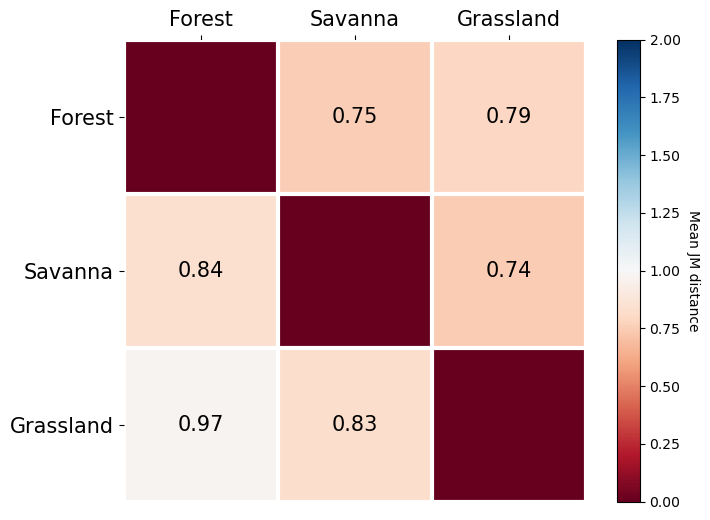

In [219]:
classes_row = ['Forest', 'Savanna', 'Grassland']
classes_column = ['Forest', 'Savanna', 'Grassland']

def func(x, pos):
    return f"{x:.2f}".replace("0.00", "")

fig, ax = plt.subplots(figsize=(8, 6))

im, _ = heatmap(dists_array, classes_row, classes_column, ax=ax,
                cmap="RdBu", cbarlabel="Mean JM distance", vmin=0, vmax=2)
annotate_heatmap(im, valfmt=matplotlib.ticker.FuncFormatter(func), size=15)

plt.savefig('C:/Users/jales/Desktop/prvi_jm_heatmaps.svg', dpi=None, facecolor='w', edgecolor='w',
    orientation='landscape', format='svg', transparent=False)

In [ ]:
dprvi_f = pd.read_csv('D:/thesis_data/VEG_INDICES/dprvi_parameters/stats/florestal_DpRVI_reindex.csv')

In [ ]:
dprvi_f 

,mean,std,median,percentile_25,percentile_75,date
0,0.579576,0.108451,0.575745,0.501885,0.653175,2017-01-12
1,0.574796,0.107735,0.570596,0.499435,0.647075,2017-01-24
2,0.572437,0.108284,0.568758,0.496480,0.645198,2017-02-05
3,0.562796,0.107303,0.558918,0.487620,0.633849,2017-02-17
4,0.582949,0.109998,0.581246,0.506426,0.657382,2017-03-01
...,...,...,...,...,...,...
144,0.544011,0.103827,0.539701,0.470426,0.613233,2021-10-30
145,0.556976,0.107623,0.551789,0.481819,0.628835,2021-11-11
146,0.544648,0.107503,0.538025,0.467981,0.616167,2021-11-23
147,0.545415,0.111854,0.539929,0.465935,0.618127,2021-12-05


In [8]:
def month_season_detector(df):

    df['data'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

    df['month'] = df['data'].dt.month

    df.loc[df['month']==1,'mes'] = 'Jan'
    df.loc[df['month']==2,'mes'] = 'Feb'
    df.loc[df['month']==3,'mes'] = 'Mar'
    df.loc[df['month']==4,'mes'] = 'Apr'
    df.loc[df['month']==5,'mes'] = 'May'
    df.loc[df['month']==6,'mes'] = 'Jun'
    df.loc[df['month']==7,'mes'] = 'Jul'
    df.loc[df['month']==8,'mes'] = 'Aug'
    df.loc[df['month']==9,'mes'] = 'Sep'
    df.loc[df['month']==10,'mes'] = 'Oct'
    df.loc[df['month']==11,'mes'] = 'Nov'
    df.loc[df['month']==12,'mes'] = 'Dec'

    df.loc[df['month']==1,'season'] = 'wet'
    df.loc[df['month']==2,'season'] = 'wet'
    df.loc[df['month']==3,'season'] = 'wet'
    df.loc[df['month']==4,'season'] = 'wet'
    df.loc[df['month']==5,'season'] = 'dry'
    df.loc[df['month']==6,'season'] = 'dry'
    df.loc[df['month']==7,'season'] = 'dry'
    df.loc[df['month']==8,'season'] = 'dry'
    df.loc[df['month']==9,'season'] = 'dry'
    df.loc[df['month']==10,'season'] = 'wet'
    df.loc[df['month']==11,'season'] = 'wet'
    df.loc[df['month']==12,'season'] = 'wet'

In [9]:
month_season_detector(dprvi_f)

In [10]:
index = ff_fs.index

## DpRVI

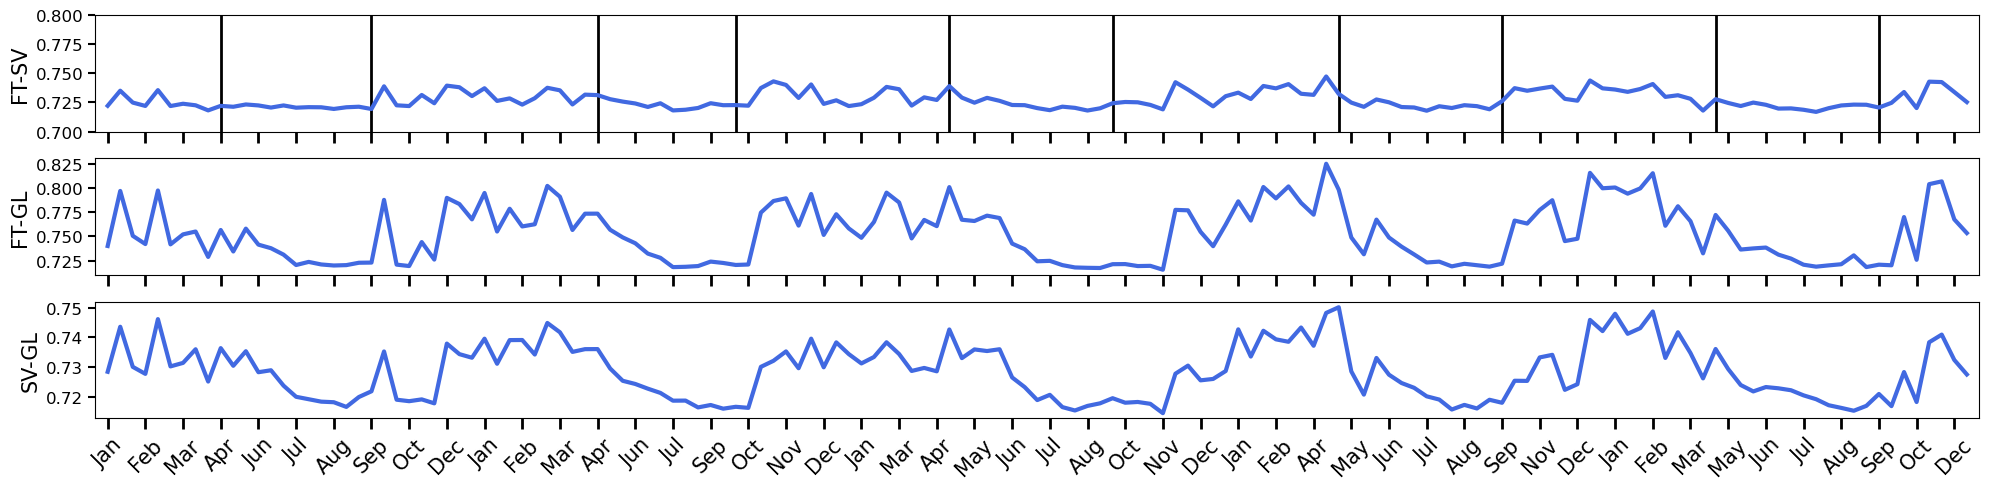

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(20, 5))

ax[0].vlines(index[9], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[21], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[39], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[50], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[67], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[80], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[98], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[111], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[128], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[141], ymin=0.5, ymax=1.5, colors='k', linewidth=2)

ax[0].plot(index, ff_fs['DpRVI'], 'royalblue', linewidth=3)
ax[0].set_xticks(ticks=index)
ax[0].tick_params(axis='y', length=5, width=1.5, labelsize=12)
ax[0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, length=8, width=2)
ax[0].set_xlim([-1, 149])
ax[0].set_ylim([0.7, 0.8])
ax[0].set_ylabel('FT-SV', fontsize=15)
ax[0].locator_params(axis='x', nbins=60)
ax[0].locator_params(axis='y', nbins=5)


ax[1].plot(index, ff_fc['DpRVI'], 'royalblue', linewidth=3)
ax[1].set_xticks(ticks=index)
ax[1].tick_params(axis='y', length=5, width=1.5, labelsize=12)
ax[1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, length=8, width=2)
ax[1].set_xlim([-1, 149])
#ax[1].set_ylim([0.70, 1.03])
ax[1].set_ylabel('FT-GL', fontsize=15)
ax[1].locator_params(axis='x', nbins=60)
ax[1].locator_params(axis='y', nbins=5)


ax[2].plot(index, fs_fc['DpRVI'], 'royalblue', linewidth=3)
ax[2].set_xticks(ticks=index)
ax[2].tick_params(axis='y', length=5, width=1.5, labelsize=12)
ax[2].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=8, width=2)
ax[2].set_xlim([-1, 149])
#ax[2].set_ylim([0.8, 1.03])
ax[2].set_ylabel('SV-GL', fontsize=15)
ax[2].locator_params(axis='x', nbins=60)
ax[2].locator_params(axis='y', nbins=5)
ax[2].set_xticklabels(labels=dprvi_f['mes'], fontdict={'fontsize': 15, 'rotation': 45, 'horizontalalignment': 'center'})

plt.tight_layout()

# plt.savefig('C:/Users/jales/Desktop/dprvi_ovl.svg', dpi=None, facecolor='w', edgecolor='w',
#     orientation='landscape', format='svg', transparent=False)

## RVI

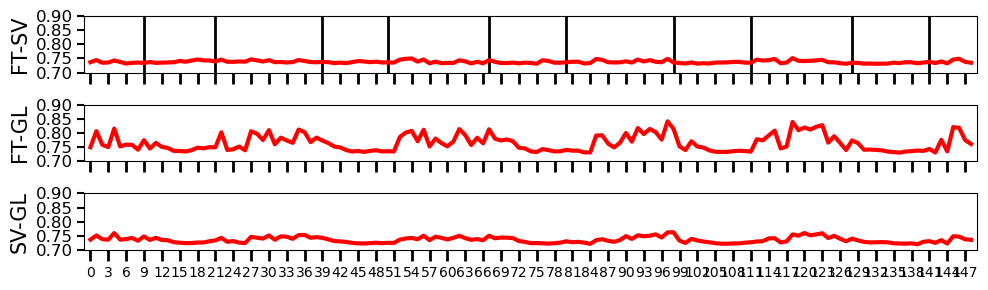

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(10, 3))

ax[0].vlines(index[9], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[21], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[39], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[50], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[67], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[80], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[98], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[111], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[128], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[141], ymin=0.5, ymax=1.5, colors='k', linewidth=2)

ax[0].plot(index, ff_fs['RVI'], 'red', linewidth=3)
ax[0].set_xticks(ticks=index)
ax[0].tick_params(axis='y', length=5, width=1.5, labelsize=12)
ax[0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, length=8, width=2)
ax[0].set_xlim([-1, 149])
ax[0].set_ylim([0.7, 0.9])
ax[0].set_ylabel('FT-SV', fontsize=15)
ax[0].locator_params(axis='x', nbins=60)
ax[0].locator_params(axis='y', nbins=5)


ax[1].plot(index, ff_fc['RVI'], 'red', linewidth=3)
ax[1].set_xticks(ticks=index)
ax[1].tick_params(axis='y', length=5, width=1.5, labelsize=12)
ax[1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, length=8, width=2)
ax[1].set_xlim([-1, 149])
ax[1].set_ylim([0.70, 0.9])
ax[1].set_ylabel('FT-GL', fontsize=15)
ax[1].locator_params(axis='x', nbins=60)
ax[1].locator_params(axis='y', nbins=5)


ax[2].plot(index, fs_fc['RVI'], 'red', linewidth=3)
ax[2].set_xticks(ticks=index)
ax[2].tick_params(axis='y', length=5, width=1.5, labelsize=12)
ax[2].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=8, width=2)
ax[2].set_xlim([-1, 149])
ax[2].set_ylim([0.7, 0.9])
ax[2].set_ylabel('SV-GL', fontsize=15)
ax[2].locator_params(axis='x', nbins=60)
ax[2].locator_params(axis='y', nbins=5)
#ax[2].set_xticklabels(labels=dprvi_f['mes'], fontdict={'fontsize': 15, 'rotation': 45, 'horizontalalignment': 'center'})

plt.tight_layout()

## DPSVI

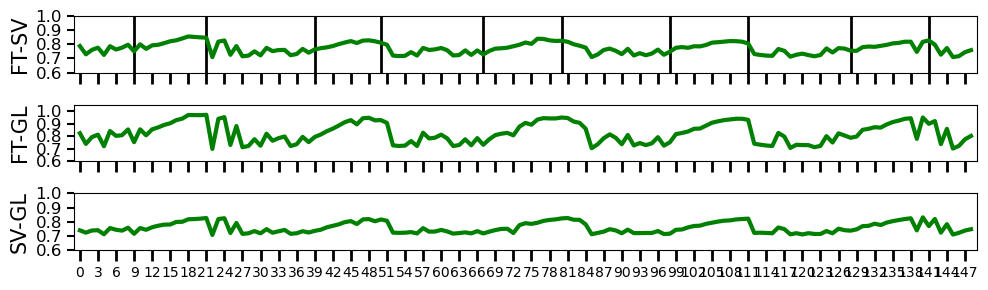

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(10, 3))

ax[0].vlines(index[9], ymin=0.0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[21], ymin=0.0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[39], ymin=0.0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[50], ymin=0.0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[67], ymin=0.0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[80], ymin=0.0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[98], ymin=0.0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[111], ymin=0.0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[128], ymin=0.0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[141], ymin=0.0, ymax=1.5, colors='k', linewidth=2)

ax[0].plot(index, ff_fs['DPSVI'], 'green', linewidth=3)
ax[0].set_xticks(ticks=index)
ax[0].tick_params(axis='y', length=5, width=1.5, labelsize=12)
ax[0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, length=8, width=2)
ax[0].set_xlim([-1, 149])
ax[0].set_ylim([0.6, 1])
ax[0].set_ylabel('FT-SV', fontsize=15)
ax[0].locator_params(axis='x', nbins=60)
ax[0].locator_params(axis='y', nbins=5)


ax[1].plot(index, ff_fc['DPSVI'], 'green', linewidth=3)
ax[1].set_xticks(ticks=index)
ax[1].tick_params(axis='y', length=5, width=1.5, labelsize=12)
ax[1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, length=8, width=2)
ax[1].set_xlim([-1, 149])
ax[1].set_ylim([0.6, 1.05])
ax[1].set_ylabel('FT-GL', fontsize=15)
ax[1].locator_params(axis='x', nbins=60)
ax[1].locator_params(axis='y', nbins=5)


ax[2].plot(index, fs_fc['DPSVI'], 'green', linewidth=3)
ax[2].set_xticks(ticks=index)
ax[2].tick_params(axis='y', length=5, width=1.5, labelsize=12)
ax[2].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=8, width=2)
ax[2].set_xlim([-1, 149])
ax[2].set_ylim([0.6, 1])
ax[2].set_ylabel('SV-GL', fontsize=15)
ax[2].locator_params(axis='x', nbins=60)
ax[2].locator_params(axis='y', nbins=5)
#ax[2].set_xticklabels(labels=dprvi_f['mes'], fontdict={'fontsize': 15, 'rotation': 45, 'horizontalalignment': 'center'})

plt.tight_layout()

## DPSVIm

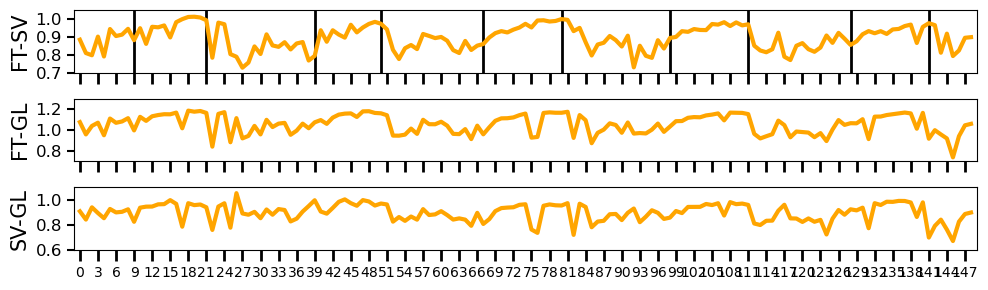

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(10, 3))

ax[0].vlines(index[9], ymin=0.0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[21], ymin=0.0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[39], ymin=0.0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[50], ymin=0.0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[67], ymin=0.0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[80], ymin=0.0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[98], ymin=0.0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[111], ymin=0.0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[128], ymin=0.0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[141], ymin=0.0, ymax=1.5, colors='k', linewidth=2)

ax[0].plot(index, ff_fs['DPSVIm'], 'orange', linewidth=3)
ax[0].set_xticks(ticks=index)
ax[0].tick_params(axis='y', length=5, width=1.5, labelsize=12)
ax[0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, length=8, width=2)
ax[0].set_xlim([-1, 149])
ax[0].set_ylim([0.7, 1.05])
ax[0].set_ylabel('FT-SV', fontsize=15)
ax[0].locator_params(axis='x', nbins=60)
ax[0].locator_params(axis='y', nbins=5)


ax[1].plot(index, ff_fc['DPSVIm'], 'orange', linewidth=3)
ax[1].set_xticks(ticks=index)
ax[1].tick_params(axis='y', length=5, width=1.5, labelsize=12)
ax[1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, length=8, width=2)
ax[1].set_xlim([-1, 149])
ax[1].set_ylim([0.7, 1.3])
ax[1].set_ylabel('FT-GL', fontsize=15)
ax[1].locator_params(axis='x', nbins=60)
ax[1].locator_params(axis='y', nbins=5)


ax[2].plot(index, fs_fc['DPSVIm'], 'orange', linewidth=3)
ax[2].set_xticks(ticks=index)
ax[2].tick_params(axis='y', length=5, width=1.5, labelsize=12)
ax[2].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=8, width=2)
ax[2].set_xlim([-1, 149])
ax[2].set_ylim([0.6, 1.1])
ax[2].set_ylabel('SV-GL', fontsize=15)
ax[2].locator_params(axis='x', nbins=60)
ax[2].locator_params(axis='y', nbins=5)
#ax[2].set_xticklabels(labels=dprvi_f['mes'], fontdict={'fontsize': 15, 'rotation': 45, 'horizontalalignment': 'center'})

plt.tight_layout()

## PRVI

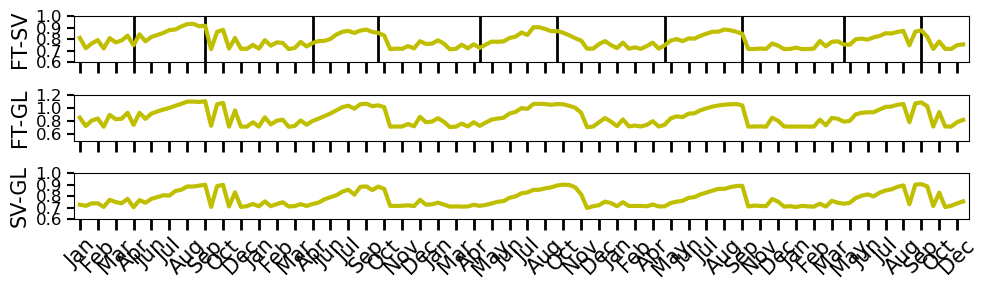

In [17]:
fig, ax = plt.subplots(3, 1, figsize=(10, 3))

ax[0].vlines(index[9], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[21], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[39], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[50], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[67], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[80], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[98], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[111], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[128], ymin=0.5, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(index[141], ymin=0.5, ymax=1.5, colors='k', linewidth=2)

ax[0].plot(index, ff_fs['PRVI'], 'y', linewidth=3)
ax[0].set_xticks(ticks=index)
ax[0].tick_params(axis='y', length=5, width=1.5, labelsize=12)
ax[0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, length=8, width=2)
ax[0].set_xlim([-1, 149])
ax[0].set_ylim([0.6, 1])
ax[0].set_ylabel('FT-SV', fontsize=15)
ax[0].locator_params(axis='x', nbins=60)
ax[0].locator_params(axis='y', nbins=5)


ax[1].plot(index, ff_fc['PRVI'], 'y', linewidth=3)
ax[1].set_xticks(ticks=index)
ax[1].tick_params(axis='y', length=5, width=1.5, labelsize=12)
ax[1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, length=8, width=2)
ax[1].set_xlim([-1, 149])
ax[1].set_ylim([0.5, 1.2])
ax[1].set_ylabel('FT-GL', fontsize=15)
ax[1].locator_params(axis='x', nbins=60)
ax[1].locator_params(axis='y', nbins=5)


ax[2].plot(index, fs_fc['PRVI'], 'y', linewidth=3)
ax[2].set_xticks(ticks=index)
ax[2].tick_params(axis='y', length=5, width=1.5, labelsize=12)
ax[2].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, length=8, width=2)
ax[2].set_xlim([-1, 149])
ax[2].set_ylim([0.6, 1])
ax[2].set_ylabel('SV-GL', fontsize=15)
ax[2].locator_params(axis='x', nbins=60)
ax[2].locator_params(axis='y', nbins=5)
ax[2].set_xticklabels(labels=dprvi_f['mes'], fontdict={'fontsize': 15, 'rotation': 45, 'horizontalalignment': 'center'})

plt.tight_layout()